# GRIP @ The Sparks Foundation
## March 2022 - Data Science & Business Analytics Internship

## Author - Hreeya Singh
### Beginner Level Task
## Task2 - Prediction using Unsupervised Machine Learning
Predict the optimum number of clusters and represent it visually from the inbuilt ‘Iris’ dataset

Dataset Link : https://bit.ly/3kXTdox

Import these libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN 
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix

In [2]:
df=pd.read_csv("Iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
df.shape

(150, 6)

In [5]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le=LabelEncoder()

In [10]:
df['Target']=le.fit_transform(df['Species'])

In [11]:
df #df.drop(['Id'], axis=1, inplace=true)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2


In [12]:
df.shape

(150, 7)

In [13]:
df['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
 6   Target         150 non-null    int32  
dtypes: float64(4), int32(1), int64(1), object(1)
memory usage: 7.7+ KB


In [15]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667,1.000000
std,43.445368,0.828066,0.433594,1.764420,0.763161,0.819232
min,1.000000,4.300000,2.000000,1.000000,0.100000,0.000000
25%,38.250000,5.100000,2.800000,1.600000,0.300000,0.000000
50%,75.500000,5.800000,3.000000,4.350000,1.300000,1.000000
75%,112.750000,6.400000,3.300000,5.100000,1.800000,2.000000
max,150.000000,7.900000,4.400000,6.900000,2.500000,2.000000


In [16]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Target
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Target,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


## Finding the optimal K value using elbow method
Finding optimum number of cluster for k-means classification

In [17]:
x= df.iloc[:,[1,2,3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters= i , init= 'k-means++',max_iter=300 , n_init = 10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

C:\Users\HREEYA SINGH\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


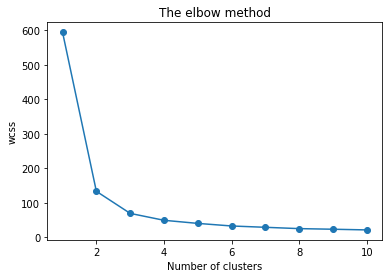

In [18]:
plt.plot(range(1,11),wcss,marker="o")
plt.title('The elbow method')
plt.ylabel('wcss')
plt.xlabel('Number of clusters')
plt.show()

## Applying KMeans Algorithm

In [19]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [20]:
# Checking the cluster of each species
df["cluster"] = y_kmeans
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Target,cluster
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0,1
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0,1
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0,1
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0,1
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0,1
...,...,...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica,2,2
146,147,6.3,2.5,5.0,1.9,Iris-virginica,2,0
147,148,6.5,3.0,5.2,2.0,Iris-virginica,2,2
148,149,6.2,3.4,5.4,2.3,Iris-virginica,2,2


In [21]:
# finding the centroid for each cluster
centroid = kmeans.cluster_centers_
print(centroid)

[[5.84655172 2.73275862 4.3637931 ]
 [5.006      3.418      1.464     ]
 [6.83571429 3.06428571 5.6547619 ]]


## Data Visualization

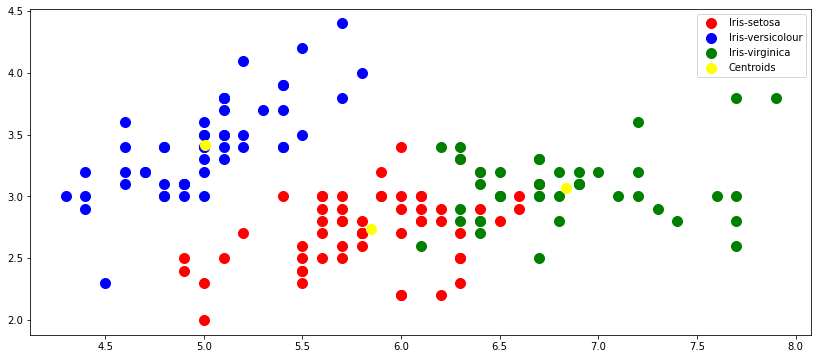

In [22]:
# Visualising the clusters - On the first two columns
plt.figure(figsize=(14,6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

### Box Plot

<AxesSubplot:ylabel='PetalWidthCm'>

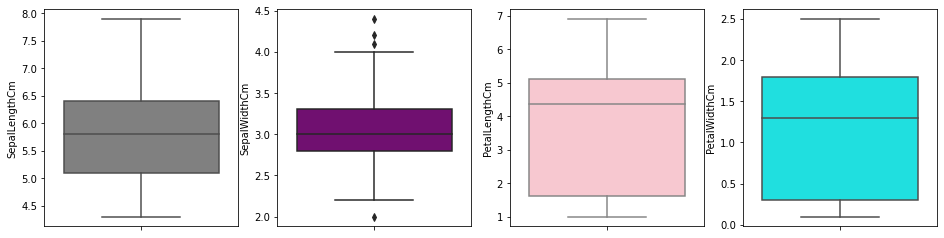

In [23]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=df,y='SepalLengthCm',color='grey')
plt.subplot(1,4,2)
sns.boxplot(data=df,y='SepalWidthCm',color='purple')
plt.subplot(1,4,3)
sns.boxplot(data=df,y='PetalLengthCm',color='pink')
plt.subplot(1,4,4)
sns.boxplot(data=df,y='PetalWidthCm',color='cyan')

### Count Plot

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

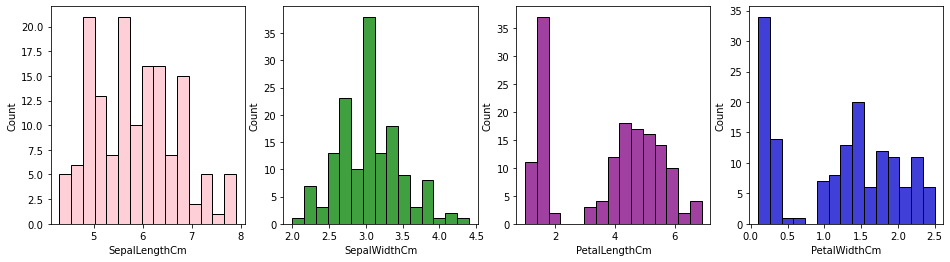

In [24]:
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.histplot(data=df,x='SepalLengthCm', bins=15,color='pink')
plt.subplot(1,4,2)
sns.histplot(data=df,x='SepalWidthCm', bins=15,color='green')
plt.subplot(1,4,3)
sns.histplot(data=df,x='PetalLengthCm', bins=15,color='purple')
plt.subplot(1,4,4)
sns.histplot(data=df,x='PetalWidthCm', bins=15,color='mediumblue')

### Heat Map

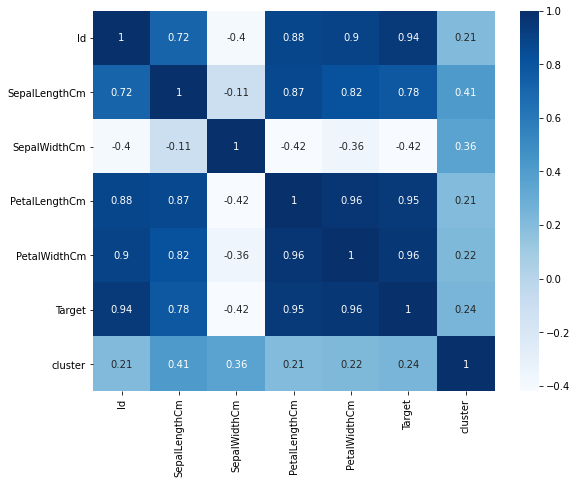

In [25]:
plt.figure(figsize=(9, 7))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

In [26]:
sns.set_style("darkgrid")
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['figure.facecolor'] = '#00000000'

### Scatter Plot

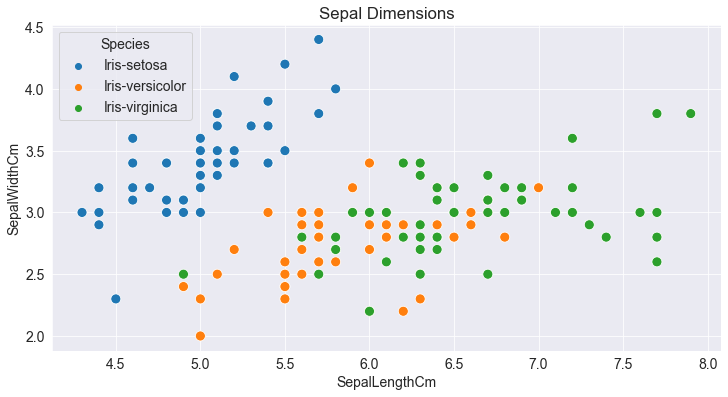

In [27]:
plt.figure(figsize=(12,6))
plt.title('Sepal Dimensions')
sns.scatterplot(x = df.SepalLengthCm, 
y = df.SepalWidthCm,
hue = df.Species, s = 100);

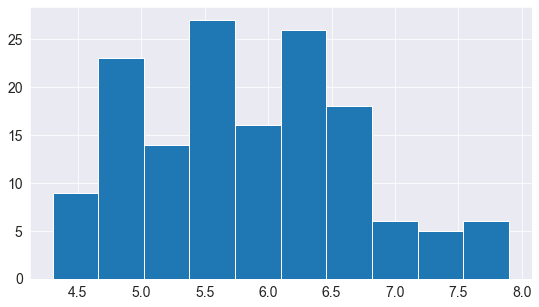

In [28]:
plt.hist(df.SepalLengthCm);

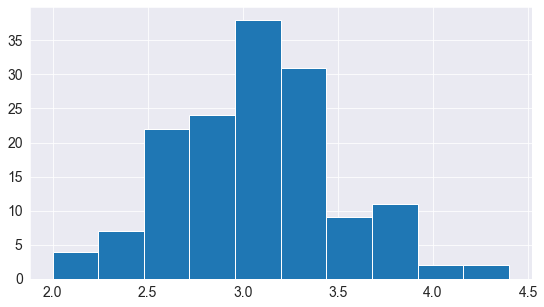

In [29]:
plt.hist(df.SepalWidthCm);

In [30]:
setosa_df = df[df.Species == 'Iris-setosa']
versicolor_df = df[df.Species == 'Iris-versicolor']
virginica_df = df[df.Species == 'Iris-virginica']

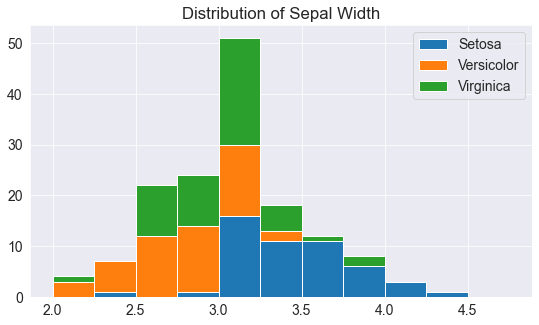

In [31]:
plt.title('Distribution of Sepal Width')

plt.hist([setosa_df.SepalWidthCm, versicolor_df.SepalWidthCm, virginica_df.SepalWidthCm], 
         bins=np.arange(2, 5, 0.25), 
         stacked=True);

plt.legend(['Setosa', 'Versicolor', 'Virginica']);

## ThankYou:)